<a href="https://colab.research.google.com/github/valentintesta/Data-Science---Productos-Bancarios/blob/main/Santander_Product__Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar Librerias**

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install opendatasets
import opendatasets as od

# **Dataset**

In [ ]:
dataset_link="https://www.kaggle.com/competitions/santander-product-recommendation/discussion"
od.download(dataset_link)


Skipping, found downloaded files in "./santander-product-recommendation" (use force=True to force download)


In [ ]:
import os
os.chdir("santander-product-recommendation")
os.listdir()


['test_ver2.csv.zip', 'train_ver2.csv.zip', 'sample_submission.csv.zip']

In [ ]:
chunks = pd.read_csv("/content/santander-product-recommendation/train_ver2.csv.zip",  chunksize=100000)


# **Preprocesamiento de datos**

In [ ]:
# valores nulos
for chunk in chunks:
    print(chunk.isnull().sum())
    break

chunk.info()

fecha_dato                    0
ncodpers                      0
ind_empleado                683
pais_residencia             683
sexo                        683
age                           0
fecha_alta                  683
ind_nuevo                   683
antiguedad                    0
indrel                      683
ult_fec_cli_1t            99872
indrel_1mes                 683
tiprel_1mes                 683
indresi                     683
indext                      683
conyuemp                 100000
canal_entrada               688
indfall                     683
tipodom                     683
cod_prov                    769
nomprov                     769
ind_actividad_cliente       683
renta                     18284
segmento                    691
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

In [ ]:
print(chunk)


       fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0      2015-01-28   1375586            N              ES    H   35   
1      2015-01-28   1050611            N              ES    V   23   
2      2015-01-28   1050612            N              ES    V   23   
3      2015-01-28   1050613            N              ES    H   22   
4      2015-01-28   1050614            N              ES    V   23   
...           ...       ...          ...             ...  ...  ...   
99995  2015-01-28    890561            N              ES    H   25   
99996  2015-01-28    890559            N              ES    H   48   
99997  2015-01-28    890557            N              ES    V   53   
99998  2015-01-28    890498            N              ES    V   47   
99999  2015-01-28    890502            N              ES    H   52   

       fecha_alta  ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  \
0      2015-01-12        0.0          6     1.0  ...                0   
1      2012-0

In [ ]:
# variables
resid_empl = ['ind_empleado', 'pais_residencia', 'indrel', 'ind_nuevo', 'indresi', 'indext', 'indfall', 'indrel_1mes', 'canal_entrada', 'tipodom']
for i in resid_empl:
    resid_empl_values = chunk[i].value_counts(normalize = True)
    print(i, end='\n')
    print(resid_empl_values)


ind_empleado
N    1.0
Name: ind_empleado, dtype: float64
pais_residencia
ES    0.999134
MX    0.000111
GB    0.000111
FR    0.000060
DE    0.000060
CO    0.000060
CH    0.000040
PT    0.000030
DO    0.000030
AR    0.000030
CN    0.000020
FI    0.000020
HN    0.000020
EC    0.000020
IT    0.000020
BR    0.000020
VE    0.000020
BE    0.000020
NL    0.000020
CL    0.000020
CA    0.000010
MZ    0.000010
CR    0.000010
IN    0.000010
PL    0.000010
TW    0.000010
AL    0.000010
IE    0.000010
US    0.000010
SE    0.000010
AT    0.000010
PE    0.000010
NI    0.000010
Name: pais_residencia, dtype: float64
indrel
1.0     0.998711
99.0    0.001289
Name: indrel, dtype: float64
ind_nuevo
0.0    0.999789
1.0    0.000211
Name: ind_nuevo, dtype: float64
indresi
S    0.999134
N    0.000866
Name: indresi, dtype: float64
indext
N    0.957147
S    0.042853
Name: indext, dtype: float64
indfall
N    0.999789
S    0.000211
Name: indfall, dtype: float64
indrel_1mes
1.0    0.99997
3.0    0.00003
Name: indrel

In [ ]:
# Eliminar variables
chunk.drop(chunk[chunk['indfall'] == 'S'].index, inplace = True)

In [ ]:
chunk.drop(chunk[['ult_fec_cli_1t', 'conyuemp', 'indrel', 'ind_empleado', 'pais_residencia', 'ind_nuevo', 'indresi', 'indext', 'indfall', 'indrel_1mes', 'canal_entrada', 'tipodom']], axis=1, inplace = True)

- Las siguientes columnas 'sexo', 'fecha_alta', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'ind_actividad_cliente' tienen el mismo número de valores faltantes. Voy a verificar si son los mismos casos y los eliminaré.

- Al mismo tiempo, eliminaré los casos en los que no se proporcione el nombre o código de la provincia, ya que la provincia puede ser una información importante.

In [ ]:
# valores nulos
chunk.isnull().sum()

fecha_dato                   0
ncodpers                     0
sexo                       683
age                          0
fecha_alta                 683
antiguedad                   0
tiprel_1mes                683
cod_prov                   769
nomprov                    769
ind_actividad_cliente      683
renta                    18281
segmento                   691
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp_fin_ult1            0
ind_deco_fin_ult1            0
ind_deme_fin_ult1            0
ind_dela_fin_ult1            0
ind_ecue_fin_ult1            0
ind_fond_fin_ult1            0
ind_hip_fin_ult1             0
ind_plan_fin_ult1            0
ind_pres_fin_ult1            0
ind_reca_fin_ult1            0
ind_tjcr_fin_ult1            0
ind_valo_fin_ult1            0
ind_viv_

In [ ]:
sexo_withNull = chunk[chunk['sexo'].isnull()]
columns_with_Nan = ['fecha_alta', 'tiprel_1mes', 'ind_actividad_cliente']
for i in columns_with_Nan:
    print(i, sexo_withNull[i].isnull().sum(), end = '\n')

fecha_alta 683
tiprel_1mes 683
ind_actividad_cliente 683


In [ ]:
chunk.dropna(subset=['sexo', 'nomprov'], inplace = True)


In [ ]:
chunk.isnull().sum()

fecha_dato                   0
ncodpers                     0
sexo                         0
age                          0
fecha_alta                   0
antiguedad                   0
tiprel_1mes                  0
cod_prov                     0
nomprov                      0
ind_actividad_cliente        0
renta                    17512
segmento                     8
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp_fin_ult1            0
ind_deco_fin_ult1            0
ind_deme_fin_ult1            0
ind_dela_fin_ult1            0
ind_ecue_fin_ult1            0
ind_fond_fin_ult1            0
ind_hip_fin_ult1             0
ind_plan_fin_ult1            0
ind_pres_fin_ult1            0
ind_reca_fin_ult1            0
ind_tjcr_fin_ult1            0
ind_valo_fin_ult1            0
ind_viv_

In [ ]:
# dataset info
chunk.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99210 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_dato             99210 non-null  object 
 1   ncodpers               99210 non-null  int64  
 2   sexo                   99210 non-null  object 
 3   age                    99210 non-null  object 
 4   fecha_alta             99210 non-null  object 
 5   antiguedad             99210 non-null  object 
 6   tiprel_1mes            99210 non-null  object 
 7   cod_prov               99210 non-null  float64
 8   nomprov                99210 non-null  object 
 9   ind_actividad_cliente  99210 non-null  float64
 10  renta                  81698 non-null  float64
 11  segmento               99202 non-null  object 
 12  ind_ahor_fin_ult1      99210 non-null  int64  
 13  ind_aval_fin_ult1      99210 non-null  int64  
 14  ind_cco_fin_ult1       99210 non-null  int64  
 15  in

## **Formato de los datos**

In [ ]:
# Convertir las fechas al formato estándar Año-Mes-Día
chunk["fecha_dato"] = pd.to_datetime(chunk["fecha_dato"],format="%Y-%m-%d")
chunk["fecha_alta"] = pd.to_datetime(chunk["fecha_alta"],format="%Y-%m-%d")

In [ ]:
# Nueva columna: month
chunk["month"] = pd.DatetimeIndex(chunk["fecha_alta"]).month
chunk["month"].value_counts()

9     22446
8     20204
10    18480
7     12144
11    11038
12     3955
4      2260
1      2241
5      2165
6      1580
2      1414
3      1283
Name: month, dtype: int64

In [ ]:
# Nueva columna: year
chunk["year"] = pd.DatetimeIndex(chunk["fecha_alta"]).year
chunk.year.value_counts()

2012    70448
2011    19352
2013     7038
2010     2152
2014      199
2015        9
2005        2
2002        2
2003        2
2006        2
2007        1
2004        1
2008        1
2009        1
Name: year, dtype: int64

## **Cuentas Corrientes**
Se calcula el número total de cuentas corrientes por mes a partir del DataFrame y luego se muestra un gráfico de línea que representa la evolución de estas cuentas a lo largo del tiempo. (la variable ind_cco_fin_ult1 tiene que ver con las cuentas corrientes).

In [ ]:
grouped = chunk.groupby('month').aggregate({'ind_cco_fin_ult1': 'sum'}).reset_index()
import plotly.express as px
px.line(grouped, x="month", y="ind_cco_fin_ult1", title="Current Accounts by Month")

## **Label Encoder: Variable Sexo**
- Se aplica label encoder a la variable sexo para covertir los valores no numéricos a numéricos.


In [ ]:
le = LabelEncoder()
chunk.sexo = le.fit_transform(chunk['sexo'])

## **Variable: tiprel_1mes**
- La variable tiprel_1mes se trata de el tipo de relación con el cliente al comienzo del mes: A (activo), I (inactivo), P (cliente anterior). Se realiza el conteo de los valores de esta variable.

In [ ]:
chunk['tiprel_1mes'].value_counts()

I    62783
A    36424
P        3
Name: tiprel_1mes, dtype: int64

- Como solo hay tres clientes anteriores, los reemplazaré como "inactivo" para tener menos label, en este caso se reemplaza por 0 y 1 (0 --- I) (1 --- A) se verifica que los valores fueron añadidos al label 0.

In [ ]:
chunk['tiprel_1mes'].replace(to_replace = ["I", "A", "P"], value = [0, 1, 0], inplace = True)
chunk['tiprel_1mes'].value_counts()

0    62786
1    36424
Name: tiprel_1mes, dtype: int64

## **Variable: Segmento**
- En la variable segmento se divide los tipos de clientes: 01 - VIP (TOP), 02 - Individuals (PARTICULARES) 03 - college graduated (UNIVERSITARIO)

In [ ]:
chunk['segmento'].value_counts()

03 - UNIVERSITARIO    75120
02 - PARTICULARES     22854
01 - TOP               1228
Name: segmento, dtype: int64

- Se reemplaza los valores específicos en la columna 'segmento' del DataFrame por nuevos valores ('Grad', 'Ind', 'VIP'). Luego, se muestra la frecuencia de cada valor único en la columna 'segmento' después de los reemplazos. Esto permite analizar la distribución de los nuevos valores en la columna 'segmento'.

In [ ]:
sub_segment = ["03 - UNIVERSITARIO", "02 - PARTICULARES", '01 - TOP']
chunk['segmento'].replace(to_replace = sub_segment, value = ['Grad', 'Ind', 'VIP'], inplace = True)
chunk['segmento'].value_counts()

Grad    75120
Ind     22854
VIP      1228
Name: segmento, dtype: int64

- Se crea una copia de la columna 'segmento', ya que podríamos necesitarla más adelante, y luego se realiza la codificación.



In [ ]:
chunk['seg'] = chunk['segmento']


## **One Hot Encoding**
Se realiza la codificación one-hot de la columna 'seg' del DataFrame, lo que implica crear nuevas columnas ficticias para cada valor único en 'seg'.

Se muestra las primeras tres filas del DataFrame verificando que la codificación se realizó correctamente.

In [ ]:
chunk = pd.get_dummies(chunk, columns = ['seg'])
chunk.head(3)

,fecha_dato,ncodpers,sexo,age,fecha_alta,antiguedad,tiprel_1mes,cod_prov,nomprov,ind_actividad_cliente,...,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month,year,seg_Grad,seg_Ind,seg_VIP
0,2015-01-28,1375586,0,35,2015-01-12,6,1,29.0,MALAGA,1.0,...,0,0,0.0,0.0,0,1,2015,0,1,0
1,2015-01-28,1050611,1,23,2012-08-10,35,0,13.0,CIUDAD REAL,0.0,...,0,0,0.0,0.0,0,8,2012,1,0,0
2,2015-01-28,1050612,1,23,2012-08-10,35,0,13.0,CIUDAD REAL,0.0,...,0,0,0.0,0.0,0,8,2012,1,0,0


## **Variable: int_columns**

- Se crea la variable int_columns la cual contiene la edad, antiguedad y renta, estas variables son numericas pero en la base de datos son de tipo object, por lo que se convierten en varaibles numéricas

In [ ]:
int_columns = ['age', 'antiguedad', 'renta']
for column in int_columns:
    chunk[column] = pd.to_numeric(chunk[column])

# **Analisis Univarible: Variable Edad**


### **Estadisticas descriptivas**
- Se muestra estadísticas descriptivas que nos permiten obtener una comprensión rápida de la distribución y características de los valores de edad en el conjunto de datos.

In [ ]:
chunk.age.describe()

count    99210.000000
mean        29.329160
std         10.526078
min          4.000000
25%         23.000000
50%         25.000000
75%         31.000000
max        106.000000
Name: age, dtype: float64

### **Histograma**
- Se genera un histograma de la distribución de los valores de edad en la columna 'age' del DataFrame.

- El histograma muestra la frecuencia de los diferentes valores de edad y proporciona una visualización de la distribución de edades en el conjunto de datos.

(array([6.8400e+02, 4.4747e+04, 3.4661e+04, 9.8910e+03, 5.1350e+03,
        2.5840e+03, 9.0100e+02, 3.9800e+02, 1.8800e+02, 2.1000e+01]),
 array([  4. ,  14.2,  24.4,  34.6,  44.8,  55. ,  65.2,  75.4,  85.6,
         95.8, 106. ]),
 <BarContainer object of 10 artists>)

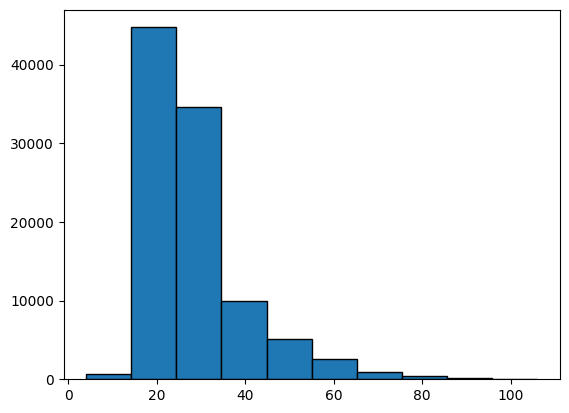

In [ ]:
plt.hist(chunk['age'], edgecolor='black')

### **Diagrama de caja**
- Se crea un diagrama de caja de la distribución de los valores de edad en la columna 'age' del DataFrame, se puede observar que existen varios valores atipicos.

<Axes: xlabel='age'>

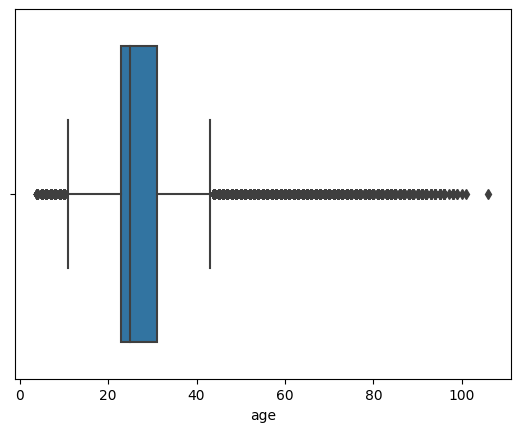

In [ ]:
sns.boxplot(x=chunk['age'])

### **Valores Atipicos**
- Se trata de eliminar la mayor cantidad de valores atipicos existentes en la variable age. Después de realizar las modificaciones en la columna 'age' se vuelve a graficar el diagrama de caja, con lo cual vemos una mejoria considerable respecto al gráfico anterior.

<Axes: xlabel='age'>

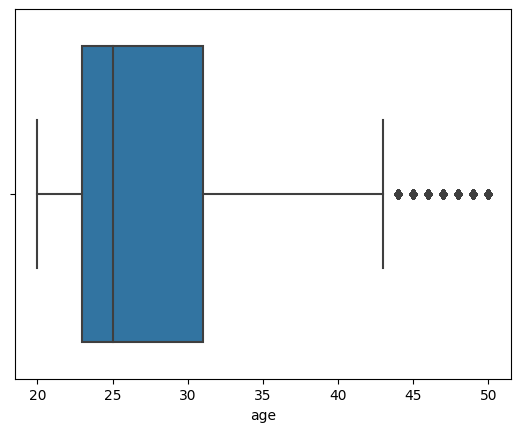

In [ ]:
chunk.loc[chunk.age < 20,"age"]  = 20
chunk.loc[chunk.age > 50,"age"] = 50

sns.boxplot(x=chunk['age'])

### **Estandarizacion de Datos**

In [ ]:
scaler = StandardScaler()
chunk['age_stand'] = scaler.fit_transform(chunk[['age']])

In [ ]:
# edad y renta
null_segmento = chunk[chunk['segmento'].isnull()]
null_segmento[["renta", 'age']]

,renta,age
18765,NaN,50
30944,NaN,23
34117,122290.17,25
52966,NaN,36
57893,49707.87,47
75194,NaN,24
82532,66101.16,23
99446,158917.77,44


#**Analisis Bivariable**

## **Variable Segemento/Edad: Estadisticas**

- Se agrupa el código por la columna segmento, el resultado es un DataFrame que muestra las estadísticas resumidas de la columna 'age' para cada segmento presente en el DataFrame. Esto nos permite obtener información sobre las medidas centrales y los rangos de edad en cada grupo de segmento, lo que es útil para realizar análisis comparativos y obtener una visión general de la distribución de edad en función de los segmentos.

In [ ]:
chunk.groupby('segmento').agg({'age':['mean', 'median', 'max', 'min']})


age               
               mean median max min
segmento                          
Grad      24.924215   24.0  50  20
Ind       40.387810   41.0  50  20
VIP       46.132736   50.0  50  22

## **Variable Renta: Estadisticas**

- Se realiza la misma agrupación anterior, pero en este caso con la variable 'renta'.




In [ ]:
chunk.groupby('segmento').agg({'renta':['mean', 'median', 'max', 'min']})


##**Variable: Segemento**

- Se asigna valores a la columna 'segmento' del DataFrame en función de ciertas condiciones. Si el valor de 'segmento' es nulo y el valor de 'age' es menor que 40, se establece el valor 'Grad'. Si el valor de 'segmento' es nulo y el valor de 'age' es mayor que 40, se establece el valor 'Ind'. Esto nos permite llenar los valores nulos en la columna 'segmento' según las condiciones especificadas y basándose en los valores de la columna 'age'.

In [ ]:
chunk.loc[((chunk.segmento.isnull()) & (chunk.age<40)), "segmento"] = 'Grad'
chunk.loc[((chunk.segmento.isnull()) & (chunk.age>40)), "segmento"] = 'Ind'

## **Diagrama de Cajas: Renta**
- Se crea un diagrama de caja de la distribución de los valores de la columna 'renta' en el DataFrame, esto nos proporciona una visualización de la dispersión y los estadísticos de la columna 'renta', lo que permite identificar valores atípicos y obtener una idea de la distribución de los ingresos en el conjunto de datos.

<Axes: xlabel='renta'>

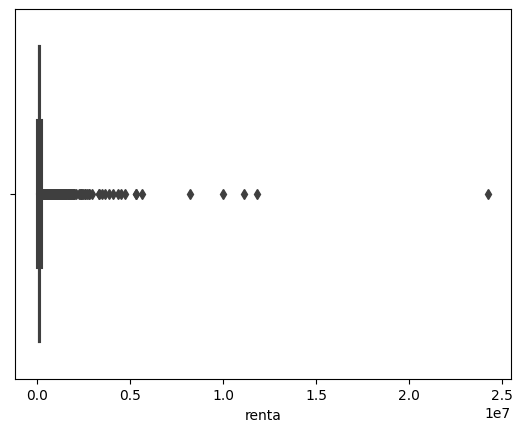

In [ ]:
sns.boxplot(x=chunk['renta'])


In [ ]:
chunk.renta.describe()

count    8.169800e+04
mean     1.155552e+05
std      1.594241e+05
min      2.539800e+03
25%      6.217019e+04
50%      8.960661e+04
75%      1.330213e+05
max      2.425324e+07
Name: renta, dtype: float64

## **Correlación: Ingresos y Edad.**

- Verificamos si hay correlación entre los ingresos y la edad.

- Se genera un gráfico de dispersión que muestra la relación entre los ingresos ('renta') y la edad ('age') en el DataFrame.

Text(0, 0.5, 'Age')

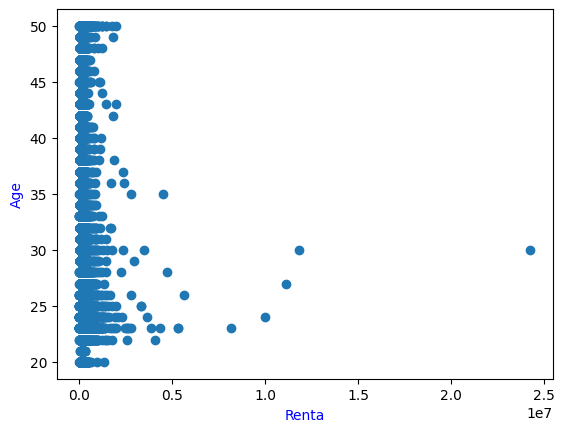

In [ ]:
plt.scatter(data = chunk, x = 'renta', y ='age')
plt.xlabel('Renta', color = "blue")
plt.ylabel('Age', color = "blue")

## **Diagrama de cajas: Renta/Segmento**
- Se crea un diagrama de caja que muestra la distribución de los valores de 'renta' para cada categoría en la columna 'segmento' del DataFrame. Nos permite comparar visualmente la distribución de ingresos en diferentes segmentos (Ind, Grad, VIP) y detectar posibles diferencias o patrones.

<Axes: xlabel='renta', ylabel='segmento'>

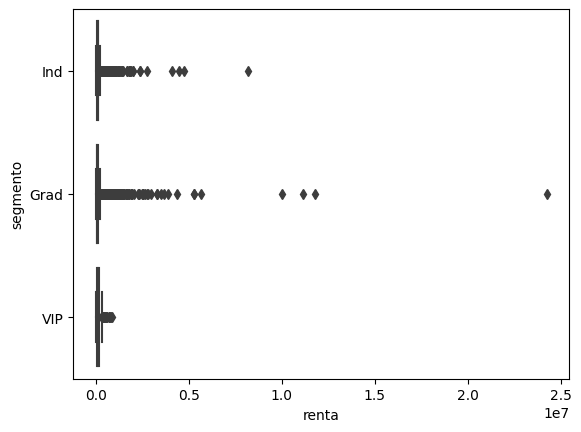

In [ ]:
sns.boxplot(data=chunk, x="renta", y="segmento")


## **Limites de valores**
Se establece un límite superior en los valores de la columna 'renta' del DataFrame. Si algún valor es mayor o igual a 1000000, se reemplaza por el valor 1000000. Esto es útil para limitar los valores extremos o atípicos en la columna 'renta' y asegurar que no haya valores excesivamente altos en el análisis posterior.

In [ ]:
chunk.loc[chunk.renta>=1000000, "renta"] = 1000000


<Axes: xlabel='renta', ylabel='segmento'>

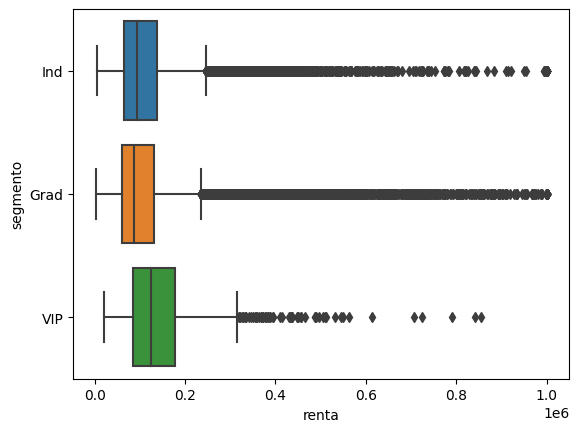

In [ ]:
sns.boxplot(data=chunk, x="renta", y="segmento")


## **Diagrama de Cajas: Renta/Provincias**

- Se gráfica los diagramas de caja que muestra la distribución de los valores de 'renta' para cada categoría en la columna 'nomprov' (nombre de provincias) del DataFrame. Esto nos permite comparar visualmente la distribución de ingresos en diferentes provincias y detectar posibles diferencias o patrones.

<Axes: xlabel='renta', ylabel='nomprov'>

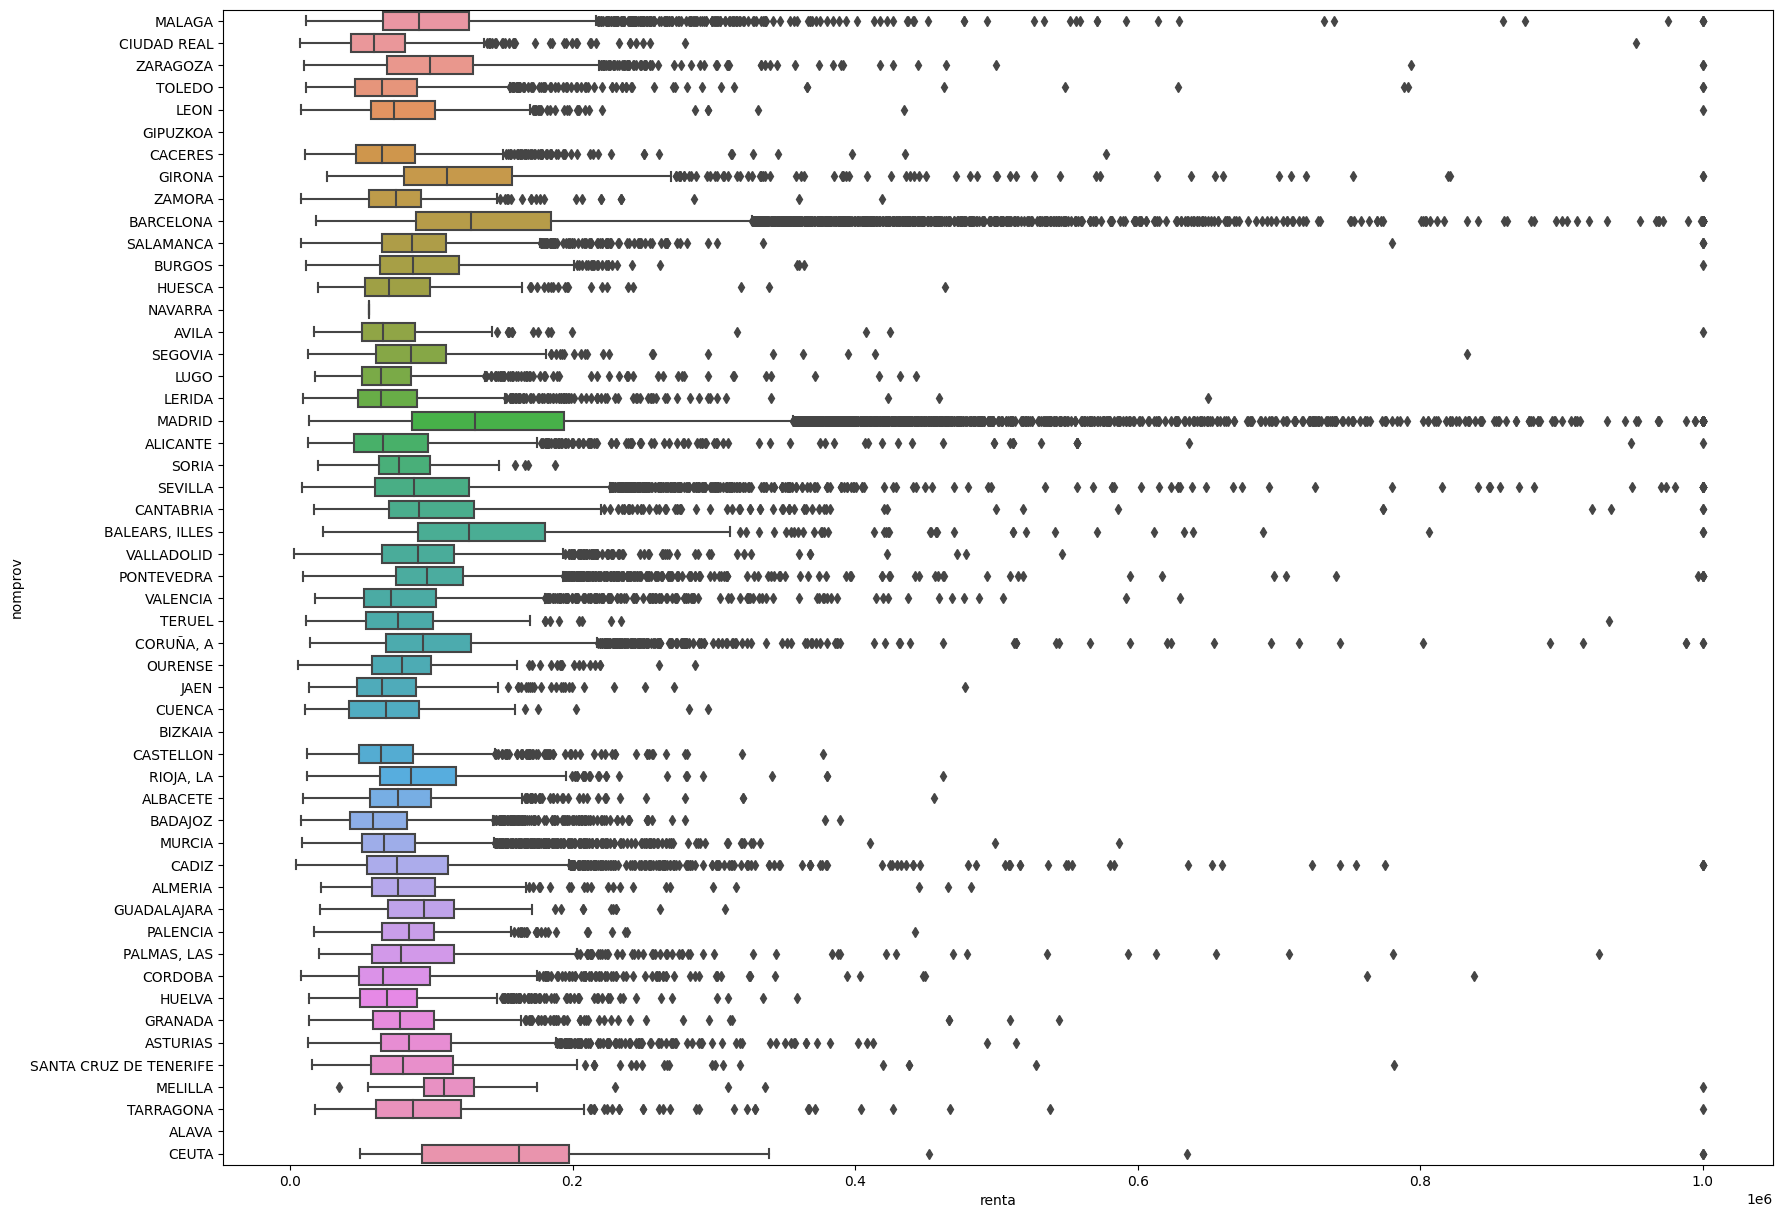

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data=chunk, x="renta", y="nomprov")

## **Grafico Categorico: Provincias/Segmento**

- Se crea un gráfico categórico con filas para cada categoría única en la columna 'segmento'. Cada fila muestra diagramas de caja que representan la distribución de los valores de 'renta' para cada categoría en la columna 'nomprov'. Esto permite comparar visualmente la distribución de ingresos en diferentes provincias y segmentos.

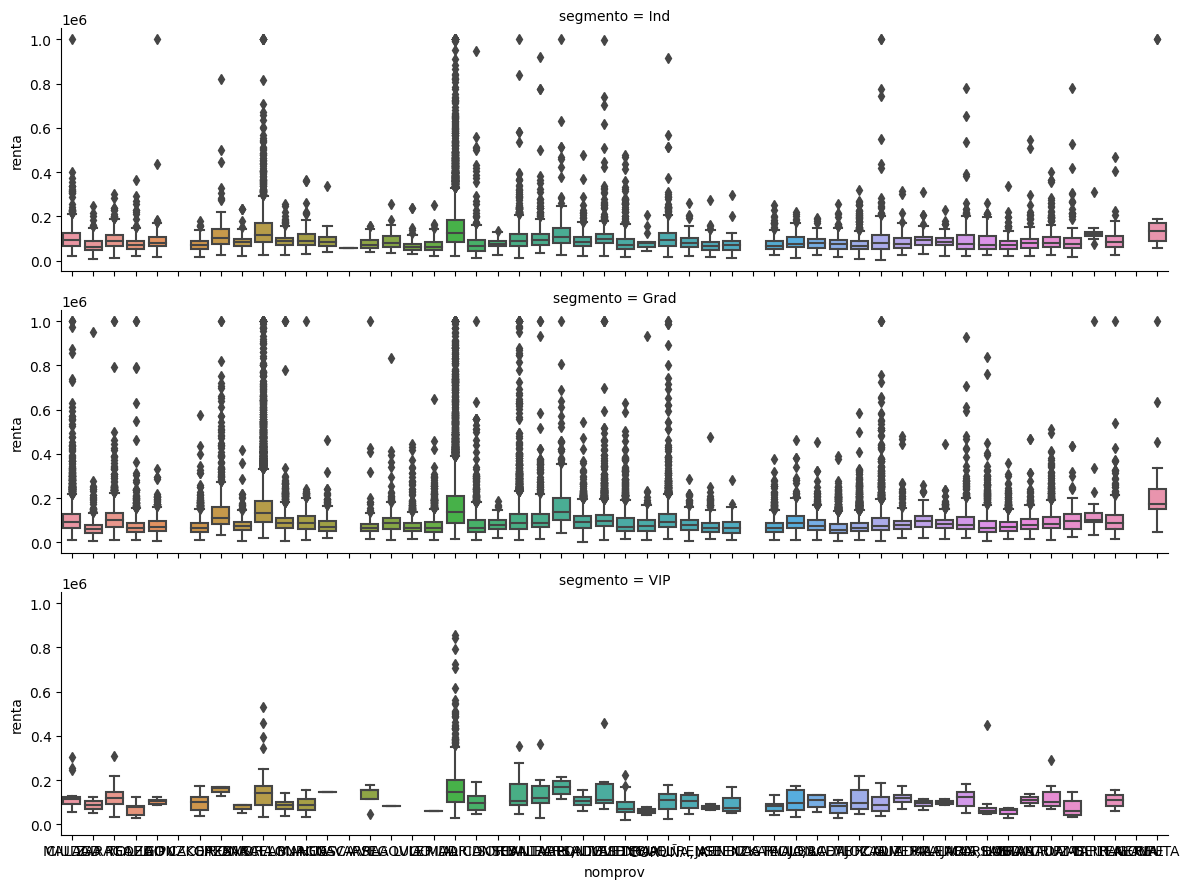

In [ ]:
sns.catplot(
    data=chunk,
    x='nomprov',
    y = 'renta',
    row ='segmento',
    kind='box',
    height=3,
    aspect=4)

# **Analisis Univariable**



# **Provincias**
- Se agrupa el DataFrame por provincia y calculamos estadísticas resumidas de la columna 'renta' para cada provincia, como la media, la mediana, el máximo, el mínimo y el recuento de valores. El resultado se almacena en el DataFrame nompr_renta, que proporciona una visión general de las estadísticas de ingresos para cada provincia en el conjunto de datos.

In [ ]:
nompr_renta = chunk.groupby('nomprov').agg({'renta':['mean', 'median', 'max', 'min', 'count']})
nompr_renta

renta                                         
                                 mean      median         max       min  count
nomprov                                                                       
ALAVA                             NaN         NaN         NaN       NaN      0
ALBACETE                 82406.942675   76185.390   455994.48   9180.00   1088
ALICANTE                 82870.310509   65651.775  1000000.00  12585.96   1924
ALMERIA                  90829.209596   76218.570   482363.88  22213.80    297
ASTURIAS                 97793.934933   84023.370   513786.54  12857.49   1563
AVILA                    77006.183962   66057.930  1000000.00  17287.71    366
BADAJOZ                  68101.732732   58572.810   389421.45   8124.72   2291
BALEARS, ILLES          159068.964397  126953.070  1000000.00  23542.50    473
BARCELONA               159465.194626  128174.550  1000000.00  18567.60   9555
BIZKAIA                           NaN         NaN         NaN       NaN      0
BURGOS                   96373.104827   87084.555  1000000.00  11154.06    868
CACERES                  72744.863044   65419.380   577415.13  10652.82   1557
CADIZ                    95769.799152   75589.200  1000000.00   4559.55   2794
CANTABRIA               119203.466438   90952.140  1000000.00  16760.25    786
CASTELLON                74811.547642   64243.950   377178.87  11933.04    895
CEUTA                   247478.084062  161749.710  1000000.00  49286.49     32
CIUDAD REAL              66489.078497   59292.210   952513.17   6875.01   1038
CORDOBA                  80982.945725   66158.070   838152.54   8034.15   1551
CORUÑA, A               108029.946078   94054.200  1000000.00  14135.67   3799
CUENCA                   69473.093912   68058.735   295889.07  10500.03    616
GIPUZKOA                          NaN         NaN         NaN       NaN      0
GIRONA                  141454.598033  111021.900  1000000.00  25991.28    854
GRANADA                  87772.143577   78183.495   544433.55  13646.73    738
GUADALAJARA              97511.646254   95043.900   307990.59  21309.81    283
HUELVA                   74866.709650   68853.900   358766.25  13321.02   1456
HUESCA                   82514.632920   70390.290   463665.12  19632.24    339
JAEN                     74353.585504   65293.800   477570.24  13627.05    407
LEON                     87253.725705   73716.870  1000000.00   7816.92    461
LERIDA                   80024.186765   64584.465   649599.33   9482.13    918
LUGO                     77015.603564   64744.200   442775.28  17557.80    825
MADRID                  162162.369163  130920.270  1000000.00  13690.89  14751
MALAGA                  108825.097061   91119.285  1000000.00  10983.54   3018
MELILLA                 144164.339487  108836.370  1000000.00  34437.12     39
MURCIA                   77045.655655   66685.785   586758.90   8559.24   3206
NAVARRA                  55866.120000   55866.120    55866.12  55866.12      1
OURENSE                  81678.667630   79101.285   286517.07   5437.62    810
PALENCIA                 88151.148539   84006.480   442752.93  16924.53    479
PALMAS, LAS              96400.191752   78600.030   926880.45  20761.08   1273
PONTEVEDRA              111897.800052   96656.610  1000000.00   9450.00   2679
RIOJA, LA                95876.224038   85837.170   462083.76  12219.90    624
SALAMANCA                95090.063089   86050.560  1000000.00   8075.46   1761
SANTA CRUZ DE TENERIFE  100780.968383   79875.840   781590.00  15371.10    266
SEGOVIA                  97551.621226   85583.235   833481.30  12518.94    318
SEVILLA                 109767.166243   88084.350  1000000.00   8740.26   4674
SORIA                    83629.038496   77178.540   187516.53  19608.87    133
TARRAGONA               101551.714398   86789.085  1000000.00  17719.02    548
TERUEL                   87603.263486   76177.140   933319.86  11151.63    175
TOLEDO                   77506.178995   65218.800  1000000.00  11072.79   1473
VAL

In [ ]:
# valores nulos
chunk.drop(chunk[chunk['nomprov'].isin(['ALAVA', 'BIZKAIA', 'GIPUZKOA'])].index, inplace = True)


## **Renta**

In [ ]:
# mediana
def medianRentaProvAll(dfp):
    nameProv = dfp.nomprov.unique()[0]
    median = dfp.renta.median(skipna=True)
    print(nameProv, median)
    dfp.loc[dfp.renta.isnull(), 'renta'] = median
    return dfp

chunk = chunk.groupby('nomprov').apply(medianRentaProvAll)
chunk.loc[chunk.renta.isnull(), "renta"] = chunk.renta.median

ALBACETE 76185.39
ALICANTE 65651.775
ALMERIA 76218.56999999999
ASTURIAS 84023.37
AVILA 66057.93
BADAJOZ 58572.81
BALEARS, ILLES 126953.07
BARCELONA 128174.55
BURGOS 87084.555
CACERES 65419.38
CADIZ 75589.20000000001
CANTABRIA 90952.14
CASTELLON 64243.95
CEUTA 161749.71
CIUDAD REAL 59292.21
CORDOBA 66158.06999999999
CORUÑA, A 94054.2
CUENCA 68058.735
GIRONA 111021.90000000001
GRANADA 78183.495
GUADALAJARA 95043.9
HUELVA 68853.9
HUESCA 70390.29000000001
JAEN 65293.8
LEON 73716.87
LERIDA 64584.465000000004
LUGO 64744.2
MADRID 130920.27
MALAGA 91119.285
MELILLA 108836.37
MURCIA 66685.785
NAVARRA 55866.12
OURENSE 79101.285
PALENCIA 84006.48
PALMAS, LAS 78600.03
PONTEVEDRA 96656.61
RIOJA, LA 85837.17
SALAMANCA 86050.56
SANTA CRUZ DE TENERIFE 79875.84
SEGOVIA 85583.23499999999
SEVILLA 88084.35
SORIA 77178.54000000001
TARRAGONA 86789.08499999999
TERUEL 76177.14
TOLEDO 65218.8
VALENCIA 71293.65
VALLADOLID 90349.77
ZAMORA 74786.205
ZARAGOZA 98755.485


<ipython-input-81-f17b1a9a8ba1>:9: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
# Valores enteros: rent log
chunk['renta'] = chunk['renta'].astype(int)
chunk['renta_log'] = np.log(chunk['renta'])

### **Histograma**

- El primer histograma muestra la distribución de los ingresos originales 'renta', mientras que el segundo histograma muestra la distribución transformada logarítmicamente de los ingresos 'renta_log'.

Text(0.5, 1.0, 'Log-Transformed Income')

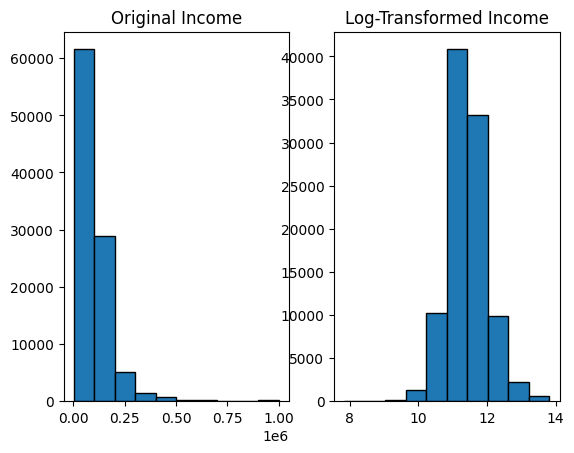

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(chunk['renta'], edgecolor='black')
axs[1].hist(chunk['renta_log'], edgecolor='black')


axs[0].set_title('Original Income')
axs[1].set_title('Log-Transformed Income')

# **Estandarizacion de datos**
- Se estandariza los valores de la columna 'antiguedad' en el DataFrame utilizando la clase StandardScaler, lo que permite comparar y analizar los valores de 'antiguedad' en una escala común y reducir la influencia de valores extremos o atípicos en el análisis posterior.

In [ ]:
scaler = StandardScaler()
chunk.antiguedad = scaler.fit_transform(chunk[['antiguedad']])

# **Modelo de Regresion**

## **Entrenamiento**

- Despues del preprocesamiento de los datos se divide en df_X y df_y para empezar el analisis.
- Se selecciona las columnas 'sexo', 'age_stand', 'renta_log', 'tiprel_1mes', 'antiguedad', 'month', 'seg_Grad', 'seg_Ind', 'seg_VIP' como caracterisiticas.

- df_y contiene los valores objetivo (producto financiero 'ind_cco_fin_ult1') asociados a cada registro en df_X.

In [ ]:
df_X = chunk[['sexo', 'age_stand', 'renta_log', 'tiprel_1mes', 'antiguedad', 'month', 'seg_Grad', 'seg_Ind', 'seg_VIP']].copy()
df_y = chunk['ind_cco_fin_ult1'].copy()

In [ ]:
df_X.columns

Index(['sexo', 'age_stand', 'renta_log', 'tiprel_1mes', 'antiguedad', 'month',
       'seg_Grad', 'seg_Ind', 'seg_VIP'],
      dtype='object')

In [ ]:
# df_X valores unicos: tiprel_1mes
df_X.tiprel_1mes.value_counts()

0    62477
1    35897
Name: tiprel_1mes, dtype: int64

In [ ]:
# df_X renombre de columnas
new_column = ['gender', 'age_std', 'income_log', 'customer_type', 'seniority', 'month','seg_Grad', 'seg_Ind', 'seg_VIP']
df_X.columns = new_column
df_X.head(3)

,gender,age_std,income_log,customer_type,seniority,month,seg_Grad,seg_Ind,seg_VIP
0,0,0.761413,11.376166,1,-4.638796,1,0,1,0
1,1,-0.700419,10.478639,0,-0.210303,8,1,0,0
2,1,-0.700419,11.713242,0,-0.210303,8,1,0,0


In [ ]:
# variable objetivo : info
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98374 entries, 0 to 99996
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         98374 non-null  int64  
 1   age_std        98374 non-null  float64
 2   income_log     98374 non-null  float64
 3   customer_type  98374 non-null  int64  
 4   seniority      98374 non-null  float64
 5   month          98374 non-null  int64  
 6   seg_Grad       98374 non-null  uint8  
 7   seg_Ind        98374 non-null  uint8  
 8   seg_VIP        98374 non-null  uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 7.6 MB


## **Separacion de datos**
- Dividir los datos en conjuntos de entrenamiento y prueba.
- Se realiza el entrenamiento del modelo definiendo que el tamaño de los datos sean: 70% entrenamiento y 30% testeo.



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=50)

## **Regresion Logistica**

- Se crea una instancia de la regresión logística y ajusta el modelo utilizando los conjuntos de entrenamiento X_train y y_train.
- El modelo aprende de los patrones en los datos de entrenamiento.

In [ ]:
log_model = LogisticRegression(solver='lbfgs', max_iter=3000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

### **Prediccion**

- Se utiliza el modelo de regresión logística entrenado para realizar predicciones en el conjunto de entrenamiento X_train.


In [ ]:
y_pred_train = log_model.predict(X_train)

## **Evaluacion**

- Se calcula la matriz de confusión entre las etiquetas verdaderas y predichas en el conjunto de entrenamiento.
- Proporciona información sobre la precisión y el rendimiento del modelo en las muestras de entrenamiento.

In [ ]:
from sklearn import metrics

cnf_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)
cnf_matrix_train

array([[  246,  6146],
       [   59, 62410]])

## **Matriz Confusion**
Se utiliza el modelo de regresión logística entrenado para realizar predicciones en el conjunto de prueba. Luego, se calcula la matriz de confusión basada en las etiquetas verdaderas y las etiquetas predichas en el conjunto de prueba.

In [ ]:
y_pred_test = log_model.predict(X_test)
cnf_matrix_test = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix_test

array([[   95,  2632],
       [   24, 26762]])

## **Metricas**

Se imprime las metricas de evaluación del modelo, en la cual se obtiene el 80% de precision de predecir el label 0 y el 91% de precisión del label 1.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.03      0.07      2727
           1       0.91      1.00      0.95     26786

    accuracy                           0.91     29513
   macro avg       0.85      0.52      0.51     29513
weighted avg       0.90      0.91      0.87     29513



## **Conclusion**

Lo que se quiere predecir es el producto financiero ('ind_cco_fin_ult1') en este caso etiquetado como 0 y 1, es decir, se predice si el cliente va a efectuar la transacción de producto o no.